In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe() 

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


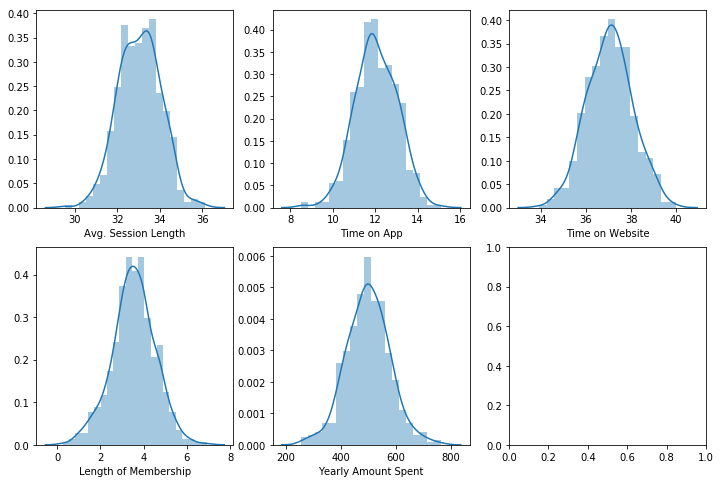

In [118]:
f,ax = plt.subplots(2,3,figsize=(12,8))

sns.distplot(df['Avg. Session Length'],ax=ax[0,0])
sns.distplot(df['Time on App'],ax=ax[0,1])
sns.distplot(df['Time on Website'],ax=ax[0,2])
sns.distplot(df['Length of Membership'],ax=ax[1,0])
sns.distplot(df['Yearly Amount Spent'],ax=ax[1,1])


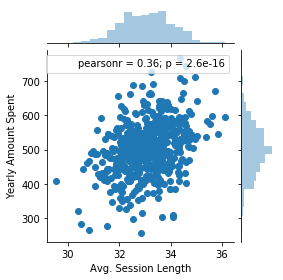

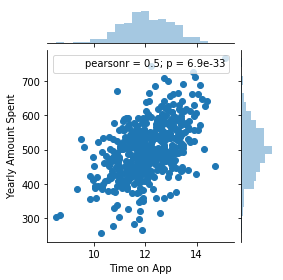

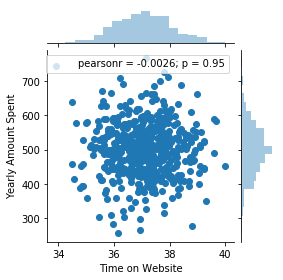

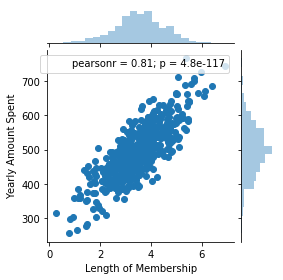

In [164]:
sns.jointplot('Avg. Session Length','Yearly Amount Spent', data=df,size=4)
sns.jointplot('Time on App','Yearly Amount Spent', data=df,size=4)
sns.jointplot('Time on Website','Yearly Amount Spent', data=df,size=4)
sns.jointplot('Length of Membership','Yearly Amount Spent', data=df,size=4)




In [157]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [5]:
X = df.drop(['Yearly Amount Spent','Email','Address','Avatar'],axis = 1)
y = df['Yearly Amount Spent']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [194]:
# Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
lrm = LinearRegression()

In [197]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
pred_lrm = lrm.predict(X_test)

In [204]:
coe = pd.DataFrame(lrm.coef_,X.columns, columns=['Coeff'])
coe

,Coeff
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


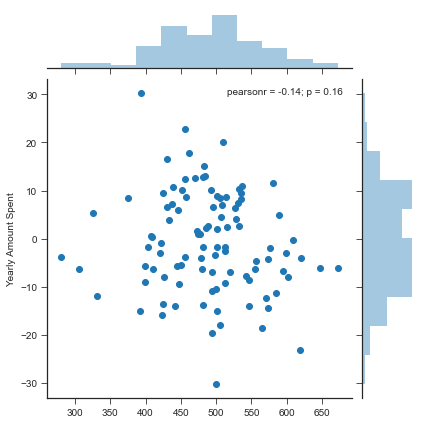

In [205]:
sns.jointplot(pred_lrm, y_test-pred_lrm)

In [207]:
# knn

In [218]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [225]:
best_r2=0
best_n=0
for i in range (1,100):
    knn = KNeighborsRegressor(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    if(i==1):
        best_r2 = metrics.r2_score(y_test, pred_knn)
        best_n=i
    elif(metrics.r2_score(y_test, pred_knn)> best_r2):
        best_r2= metrics.r2_score(y_test, pred_knn)
        best_n=i
        
print(best_r2, best_n)


0.910777823816 6


In [227]:
knn = KNeighborsRegressor(n_neighbors= 6)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

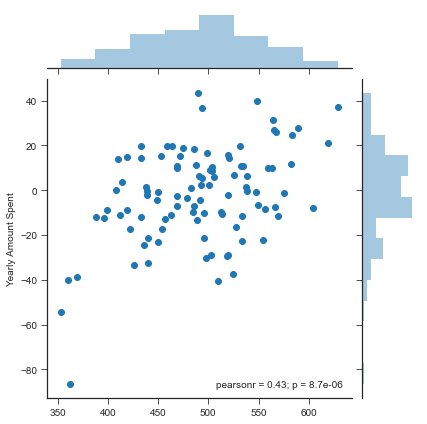

In [229]:
sns.jointplot(pred_knn, y_test-pred_knn)

In [8]:
# Decision tree

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
tree = DecisionTreeRegressor()

In [11]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
pred_tree = tree.predict(X_test)

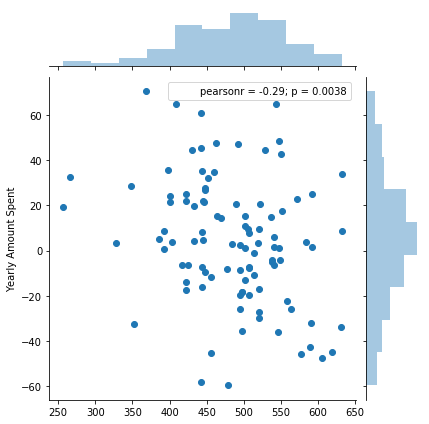

In [13]:
sns.jointplot(pred_tree, y_test-pred_tree)

In [15]:
# Ramdonforest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rfr = RandomForestRegressor(n_estimators=100)

In [18]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
pred_rfr = rfr.predict(X_test)

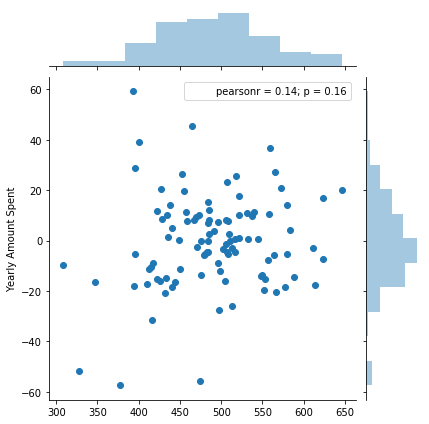

In [20]:
sns.jointplot(pred_rfr, y_test-pred_rfr)

In [21]:
# SVM

In [22]:
from sklearn.svm import SVR

In [23]:
svr = SVR()

In [24]:
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
pred_svr = svr.predict(X_test)

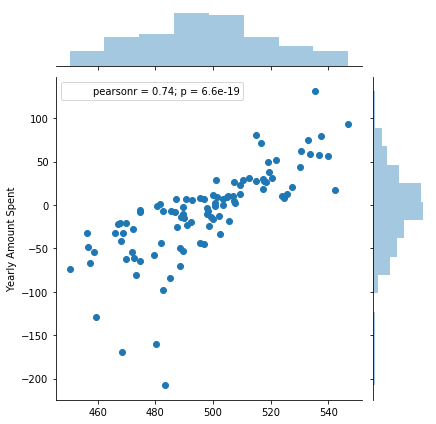

In [26]:
sns.jointplot(pred_svr, y_test-pred_svr)

In [27]:
# terrible, lets try to apply GridSearchCV to find a better perameter for C and gamma

In [28]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid={'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]} 
grid=GridSearchCV(SVR(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [31]:
grid.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [33]:
# now fit the model again

In [34]:
pred_grid = grid.predict(X_test)

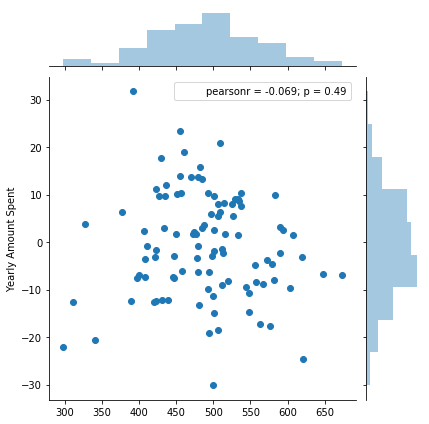

In [35]:
sns.jointplot(pred_grid, y_test-pred_grid)

In [36]:
# better